In [1]:
# Importing Libs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [12, 7]

In [3]:
df = pd.read_csv('../enc_devs_py.csv')

In [4]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Modalidad
---
- Modalidad de trabajo de los encuestados.

In [5]:
# Cantidad de respuestas.
df['Modalidad'].shape

(342,)

In [6]:
# Conteo de respuestas vacias.
df['Modalidad'].isna().sum()

0

In [7]:
df['Modalidad'].value_counts()

Remoto                       145
Hibrído                      110
Presencial                    78
Ninguna de las anteriores      9
Name: Modalidad, dtype: int64

In [8]:
df['Modalidad'].value_counts(normalize=True)

Remoto                       0.423977
Hibrído                      0.321637
Presencial                   0.228070
Ninguna de las anteriores    0.026316
Name: Modalidad, dtype: float64

<AxesSubplot:title={'center':'Modalidad de Trabajo'}>

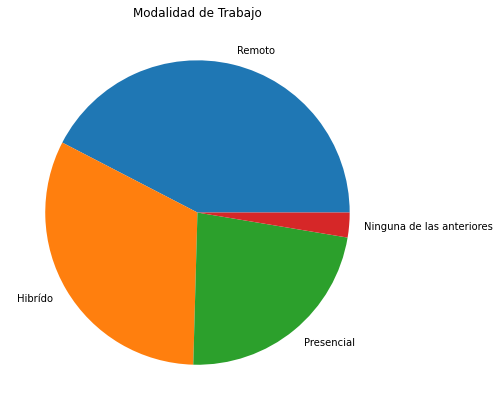

In [9]:
df['Modalidad'].value_counts(normalize=True).plot(
    kind = 'pie',
    title = 'Modalidad de Trabajo',
    ylabel = '')

In [10]:
df['Modalidad'].value_counts().keys()

Index(['Remoto', 'Hibrído', 'Presencial', 'Ninguna de las anteriores'], dtype='object')

In [11]:
df['Modalidad'].replace({
    'Ninguna de las anteriores':'Ninguna'
}, inplace =True)

In [12]:
df['Modalidad'].value_counts().keys()

Index(['Remoto', 'Hibrído', 'Presencial', 'Ninguna'], dtype='object')

# Modalidad de trabajo por genero.
---

In [13]:
df['Género'].value_counts().keys()

Index(['Hombre', 'Mujer', 'Prefiero no compartir', 'Otros', 'Género'], dtype='object')

## Genero no definido.

In [14]:
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad']

0       Remoto
78     Hibrído
146    Ninguna
147     Remoto
158     Remoto
301     Remoto
Name: Modalidad, dtype: object

In [15]:
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad'].value_counts()

Remoto     4
Ninguna    1
Hibrído    1
Name: Modalidad, dtype: int64

In [16]:
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad'].isna().sum()

0

<AxesSubplot:title={'center':'Genero Indefinido - Modalidad de Trabajo'}>

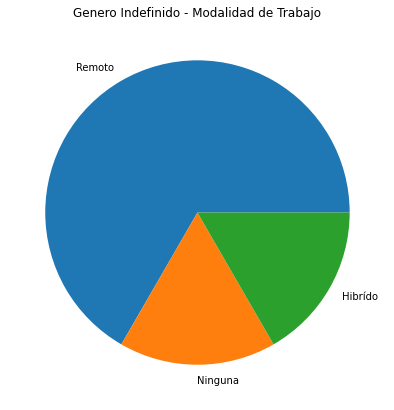

In [17]:
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad'].value_counts(normalize=True).plot(
    kind='pie',
    title='Genero Indefinido - Modalidad de Trabajo',
    ylabel = '')

## Hombres

In [18]:
df.groupby('Género').get_group('Hombre')['Modalidad'].value_counts()

Remoto        117
Hibrído        94
Presencial     60
Ninguna         8
Name: Modalidad, dtype: int64

In [19]:
df.groupby('Género').get_group('Hombre')['Modalidad'].value_counts(normalize=True)

Remoto        0.419355
Hibrído       0.336918
Presencial    0.215054
Ninguna       0.028674
Name: Modalidad, dtype: float64

/home/torrezmn/Documents/DS_ENV/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:title={'center':'Modalidad de Trabajo de Hombres'}>

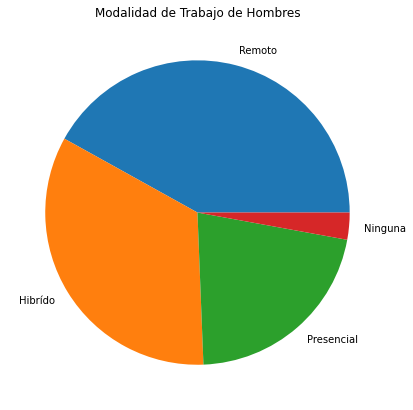

In [20]:
df.groupby('Género').get_group('Hombre')['Modalidad'].value_counts(normalize=True).plot(
    kind = 'pie',
    title = 'Modalidad de Trabajo de Hombres', 
    ylabel = '')

## Mujer

In [21]:
df.groupby('Género').get_group('Mujer')['Modalidad'].value_counts()

Remoto        20
Presencial    18
Hibrído       11
Name: Modalidad, dtype: int64

In [22]:
df.groupby('Género').get_group('Mujer')['Modalidad'].value_counts(normalize=True)

Remoto        0.408163
Presencial    0.367347
Hibrído       0.224490
Name: Modalidad, dtype: float64

<AxesSubplot:title={'center':'Modalidad de trabajo de mujeres.'}>

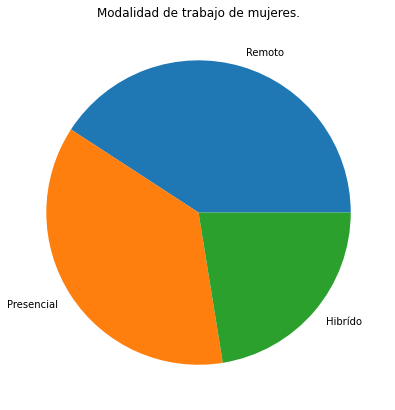

In [23]:
df.groupby('Género').get_group('Mujer')['Modalidad'].value_counts(normalize=True).plot(
    kind='pie',
    title='Modalidad de trabajo de mujeres.',
    ylabel='')

## COMPARATIVA TODOS LOS GENEROS

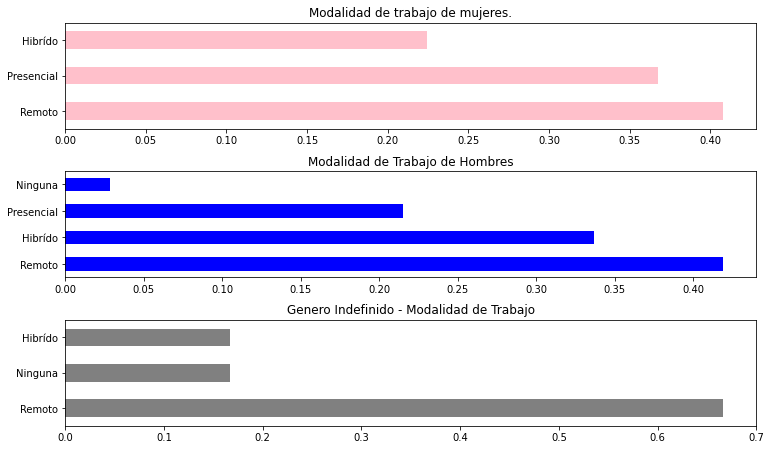

In [24]:
plt.figure() 
plt.subplot(3,1,1)


df.groupby('Género').get_group('Mujer')['Modalidad'].value_counts(normalize=True).plot(
    kind='barh',
    title='Modalidad de trabajo de mujeres.',
    ylabel='',
    color='pink'
    )


plt.subplot(3,1,2)
df.groupby('Género').get_group('Hombre')['Modalidad'].value_counts(normalize=True).plot(
    kind = 'barh',
    title = 'Modalidad de Trabajo de Hombres', 
    ylabel = '',
    color='blue')

plt.subplot(3,1,3)
df[df['Género'].isin(['Prefiero no compartir', 'Otros','Género' ])]['Modalidad'].value_counts(normalize=True).plot(
    kind='barh',
    title='Genero Indefinido - Modalidad de Trabajo',
    ylabel = '',
    color='gray',
    )


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## Modalida de Trabajo por edad
---

In [25]:
df['Edad actual '].value_counts()

30 a 34 años    120
25 a 29 años     98
35 a 39 años     51
20 a 24 años     42
40 a 44 años     16
15 a 19 años      6
45 a 49 años      3
55 a 59 años      3
50 a 54 años      3
Name: Edad actual , dtype: int64

In [26]:
df['Edad actual '].isna().sum()

0

In [31]:
grupos_etarios = [i for i in df['Edad actual '].value_counts().keys()]

In [40]:
# df.loc[df['Edad actual '] == '30 a 34 años'].shape[0]

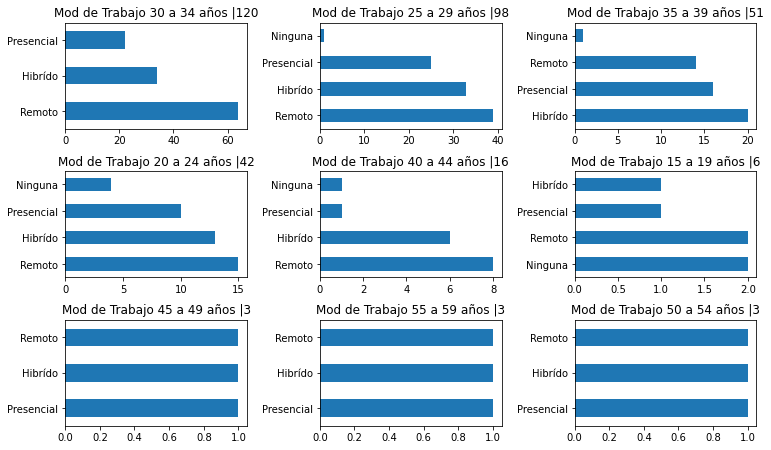

In [41]:
plt.figure() 

for k,v in enumerate(grupos_etarios):
    plt.subplot(3,3,k+1)
    df.groupby('Edad actual ').get_group(v)['Modalidad'].value_counts().plot(
        kind='barh',
        title='Mod de Trabajo {0} |{1}'.format(v,df.loc[df['Edad actual '] == v].shape[0]))
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)